In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

Question a

Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model Y=βX+ϵ, where β has some elements that are exactly equal to zero.

In [98]:
p=20
n=1000
x=np.random.randn(n,p)
k=np.array([np.random.randn() if np.random.rand()<0.5 else 0 for i in range(p)]).reshape(-1,1)
b=np.random.randn(n).reshape(-1,1)

In [99]:
y=x@k+b

Question b:

Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

Question c:

Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [101]:
class RegSubsets():
    def __init__(self,X_train,y_train,nvmx:int):
        self.X_train = X_train
        self.y_train = y_train
        self.nvmx = nvmx
    def fit(self,X_test=None,y_test=None):
        '''
        if test set is not given, then model predict on train set
        return mse of each model size
        '''
        linreg = LinearRegression()
        if X_test is None:
            X_test=self.X_train
            y_test=self.y_train
        mse = []
        for i in range(1, self.nvmx):
            rfe = RFE(linreg, n_features_to_select=i)
            rfe.fit(self.X_train, self.y_train)
            linreg.fit(self.X_train[:, rfe.support_], self.y_train)
            linreg.coef_
            y_pred = linreg.predict(X_test[:, rfe.support_])
            mse.append(mean_squared_error(y_test, y_pred))
        self.mse=mse
        # return self.mse
    def get_slope_distance(self):
        '''
        returns the euclidean distance between the slopes in the dataset and the predited slopes in each model size
        '''
        linreg = LinearRegression()
        slope_dif=[]
        for i in range(1, self.nvmx):
            rfe = RFE(linreg, n_features_to_select=i)
            rfe.fit(self.X_train, self.y_train)
            linreg.fit(self.X_train[:, rfe.support_], self.y_train)
            feature_index=list(np.where(rfe.support_==True)[0])
            # get the slopes of the selected features in the dataset
            slope_train=k[feature_index,]
            # get the predicted slope of the selected features
            slope_pred=linreg.coef_.reshape(-1,1)
            # calculate the difference
            dif=slope_train-slope_pred
            # create a temporary array
            temp=np.array([])
            # loop over the numbers
            for i in dif:
                # add each squared element to the temporary array
                temp=np.append(temp,np.square(i[0]))
            # calculate the euclidean distance
            dis=np.sqrt(np.sum(temp))
            slope_dif.append(dis)
        return slope_dif

In [102]:
regsubsets=RegSubsets(X_train,y_train,p)
regsubsets.fit()

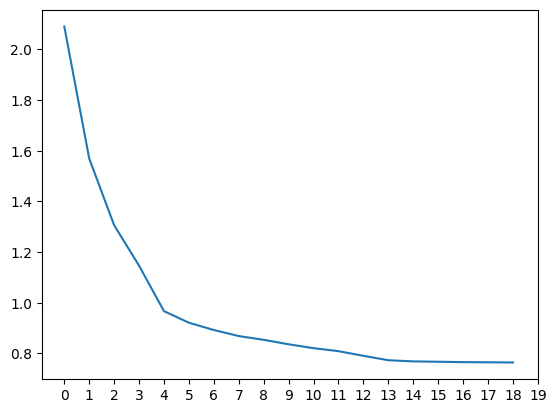

In [107]:
plt.plot(list(range(19)),regsubsets.mse)
plt.xticks(range(0,20))
plt.show()

Question d

Plot the test set MSE associated with the best model of each size.

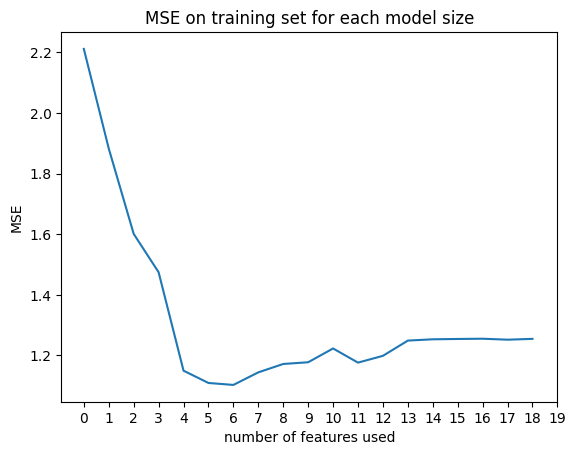

In [119]:
regsubsets.fit(X_test,y_test)
plt.plot(list(range(19)),regsubsets.mse)
plt.xticks(range(0,20))
plt.title('MSE on training set for each model size')
plt.xlabel('number of features used')
plt.ylabel('MSE')
plt.show()

Question e:

For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you aregenerating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [112]:
np.argmin(regsubsets.mse)

6

Question f:

How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [117]:
len(np.where(k==0)[0]) #11
# On the model used to generate the data, there is about 50% percent chance that the slope of a feature is zero. 
# And we see there is 11 zero slopes in the model that was used to generate the data, which suggests that using 9 features would be good.
# In the test set, we see that when feature is 6, the mse is minimal

11

Question g:

Create a plot displaying √(∑pj=1(βj−β^rj)^2) for a range of values of r, where β^rj is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

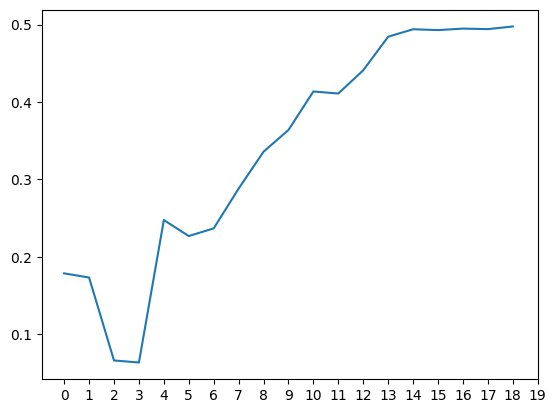

In [118]:
slope_dif=regsubsets.get_slope_distance()
plt.plot(list(range(19)),slope_dif)
plt.xticks(range(0,20))
plt.show()

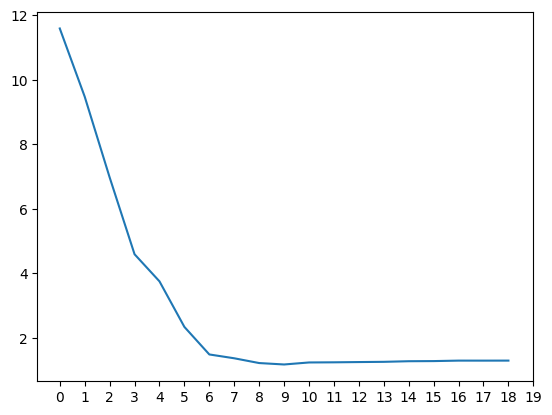

In [9]:
plt.plot(list(range(19)),test_mse)
plt.xticks(range(0,20))
plt.show()

plt.plot(list(range(19)),test_mse)
plt.xticks(range(0,20))
plt.show()

In [69]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(x, y)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [24]:
a=np.zeros((2,3))
a[:,[1,2]]

array([[0., 0.],
       [0., 0.]])

In [76]:
a=np.array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, True, False, False, False, False, False, False,])
b=np.where(a==True)

In [81]:
b[0].tolist()

[18, 19]